In [1]:
import torch
import numpy as np
import os
import glob
import urllib
import zipfile
import collections
#from google.colab import files
from PIL import Image
from IPython.display import Image as DisplayImage
from IPython.display import Javascript
from IPython.core.display import display, HTML
from compress import prepare_model, prepare_dataloader, compress_and_save, load_and_decompress
import os
from PIL import Image
import glob
import shutil
#from HIFICmodel import default_config
File = collections.namedtuple('File', ['output_path', 'compressed_path',
                                       'num_bytes', 'bpp'])
original_sizes = dict()
weights_path='weights/hific_low_zip.pt'
img_path='pepeimg'
stage_path='temp_dir'
out_path='outputimg'
model_choice='HIFIC-low'
model_choices = {'HIFIC-low': '1hfFTkZbs_VOBmXQ-M4bYEPejrD76lAY9',
                 'HIFIC-med': '1QNoX0AGKTBkthMJGPfQI0dT0_tnysYUb',
                 'HIFIC-high': '1BFYpvhVIA_Ek2QsHBbKnaBE8wn1GhFyA'}
model_ID = model_choices[model_choice]

/tmp/ipykernel_3283/2611524282.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
if torch.cuda.is_available() is False:
  print('WARNING: No GPU found. Compression/decompression will be slow!')
else:
  print(f'Found GPU {torch.cuda.get_device_name(0)}')
model, args = prepare_model(weights_path, stage_path)

12:50:12 INFO - logger_setup: /home/henrik/HIFIC/compress.py


Found GPU NVIDIA GeForce GTX 1070
Building prior probability tables...


100%|██████████| 64/64 [00:00<00:00, 299.35it/s]
/home/henrik/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/henrik/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Setting up Perceptual loss...


12:50:18 INFO - load_model: Loading model ...
12:50:18 INFO - load_model: Estimated model size (under fp32): 593.146 MB
12:50:18 INFO - load_model: Model init 6.360s


Loading model from: /home/henrik/HIFIC/src/loss/perceptual_similarity/weights/v0.1/alex.pth
...[net-lin [alex]] initialized
...Done


12:50:18 INFO - prepare_model: Model loaded from disk.
12:50:18 INFO - prepare_model: Building hyperprior probability tables...
100%|██████████| 320/320 [00:00<00:00, 1822.48it/s]
12:50:22 INFO - prepare_model: All tables built.


Got following files (2):
-> _91408619_55df76d5-2245-41c1-8031-07a4da3f313f.jpg:


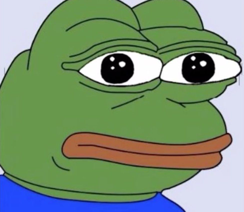

-> 180712-Weill--The-Creator-of-Pepe-hero_uionjj.jpeg:


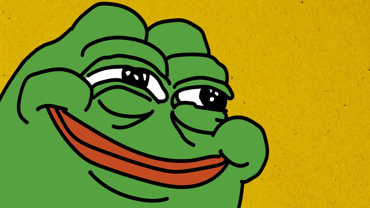

In [3]:
all_files = os.listdir(img_path)
print(f'Got following files ({len(all_files)}):')
scale_factor = 2 if len(all_files) == 1 else 4

for file_name in all_files:
    img = Image.open(os.path.join(img_path, file_name))
    w, h = img.size
    img = img.resize((w // scale_factor, h // scale_factor))
    print('-> ' + file_name + ':')
    display(img)

In [4]:

SUPPORTED_EXT = {'.png', '.jpg'}

all_files = os.listdir(img_path)
if not all_files:
    raise ValueError("Please upload/download images!")

def get_bpp(image_dimensions, num_bytes):
    w, h = image_dimensions
    return num_bytes * 8 / (w * h)

def has_alpha(img_p):
    im = Image.open(img_p)
    return im.mode == 'RGBA'

for filename in os.listdir(stage_path):
    file_path=os.path.join(stage_path, filename)
    if os.path.isfile(file_path):
        os.unlink(file_path)
for file_name in all_files:
    if os.path.isdir(file_name):
        continue
    if not any(file_name.endswith(ext) for ext in SUPPORTED_EXT):
        print('Skipping non-image', file_name, '...')
        continue
    full_path = os.path.join(img_path, file_name)
    if has_alpha(full_path) is True:
        print('Skipping because of alpha channel:', file_name)
        continue
    file_name, _ = os.path.splitext(file_name)
    original_sizes[file_name] = os.path.getsize(full_path)
    output_path = os.path.join(out_path, f'{file_name}.png')
    #!mv -v $full_path $stage_path
    shutil.copy(full_path, stage_path)

Skipping non-image 180712-Weill--The-Creator-of-Pepe-hero_uionjj.jpeg ...


In [5]:
data_loader=prepare_dataloader(args, stage_path, out_path)

Input images
['temp_dir/_91408619_55df76d5-2245-41c1-8031-07a4da3f313f.jpg']


In [6]:
compress_and_save(model, args, data_loader, out_path)

12:50:22 INFO - compress_and_save: Starting compression...
  0%|          | 0/1 [00:00<?, ?it/s]/home/henrik/anaconda3/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Symbol compressed to 29248.000 bits.


12:50:24 INFO - compress: [ESTIMATED]
12:50:24 INFO - compress: BPP: 0.074
12:50:24 INFO - compress: HL BPP: 0.011
12:50:24 INFO - compress: L BPP: 0.063
12:50:24 INFO - compress: [ATTAINED]
12:50:24 INFO - compress: BPP: 0.114
12:50:24 INFO - compress: HL BPP: 0.035
12:50:24 INFO - compress: L BPP: 0.079
12:50:24 INFO - compress_and_save: Attained: 0.115 bpp vs. theoretical: 0.074 bpp.
100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

Symbol compressed to 65696.000 bits.


In [7]:
all_outputs = []

for compressed_file in glob.glob(os.path.join(out_path, '*.hfc')):
    file_name, _ = os.path.splitext(compressed_file)
    output_path = os.path.join(out_path, f'{file_name}.png')

    # Model decode
    reconstruction = load_and_decompress(model, compressed_file, output_path)
    
    all_outputs.append(File(output_path=output_path,
                            compressed_path=compressed_file,
                            num_bytes=os.path.getsize(compressed_file),
                            bpp=get_bpp(Image.open(output_path).size, os.path.getsize(compressed_file))))
              

12:50:31 INFO - load_and_decompress: Decoding time: 6.70 s
12:50:31 INFO - load_and_decompress: Reconstruction saved to outputimg/outputimg/_91408619_55df76d5-2245-41c1-8031-07a4da3f313f_compressed.png
